In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
du = pd.read_csv('ab_data.csv')

In [56]:
du.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [57]:
du.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [58]:
du_old = du.query('group == "control" and landing_page != "old_page" ')
len(du_old)

1928

In [59]:
du_new = du.query('group == "treatment" and landing_page != "new_page" ')
len(du_new)

1965

In [60]:
du['converted'].mean()

0.11965919355605512

In [61]:
du2 = du_old.merge(du_new, how='outer')
len(du2)

3893

In [62]:
du_old2 = du.query('group == "control" and landing_page == "old_page" ')
du_new2 = du.query('group == "treatment" and landing_page == "new_page" ')

In [63]:
du2 = du_old2.merge(du_new2, how='outer')
len(du2)

290585

In [64]:
du2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [65]:
du2['user_id'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
290580    False
290581    False
290582    False
290583    False
290584    False
Name: user_id, Length: 290585, dtype: bool

In [66]:
du2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [67]:
new_p = du2.query('group == "treatment" and landing_page == "new_page"')
old_p = du2.query('group == "control" and landing_page == "old_page"')

In [109]:
len(old_p)

145274

In [68]:
new_p['converted'].mean()

0.11880724790277405

In [69]:
old_p['converted'].mean()

0.1203863045004612

In [116]:
ab_diff = new_p['converted'].mean() - old_p['converted'].mean()
ab_diff

-0.0015790565976871451

In [90]:
new_pc = np.random.choice([1, 0], size= len(new_p), p=(du2['converted'].mean(), (1- du2['converted'].mean())))
new_pc

array([0, 0, 0, ..., 0, 0, 1])

In [91]:
old_pc = np.random.choice([1, 0], size= len(old_p), p=(du2['converted'].mean(), (1- du2['converted'].mean())))
old_pc

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
new_pc.mean()

0.11729325377982397

In [93]:
old_pc.mean()

0.12122609689276814

In [94]:
new_pc.mean() - old_pc.mean()

-0.003932843112944173

In [105]:
new_pc1 = np.random.binomial(len(new_p), du2['converted'].mean(), 1000) / len(new_p)

In [104]:
old_pc1 = np.random.binomial(len(old_p), du2['converted'].mean(), 1000) / len(old_p)

In [97]:
new_pc1.mean()

0.11960733186062995

In [98]:
old_pc1.mean()

0.1196001280339221

In [126]:
np_diff = new_pc1 - old_pc1
np_diff.mean()

-1.334382146320931e-05

In [127]:
(np_diff > ab_diff).mean() * 100

89.5

In [128]:
#p-value
(np_diff < ab_diff).mean() * 100

10.5

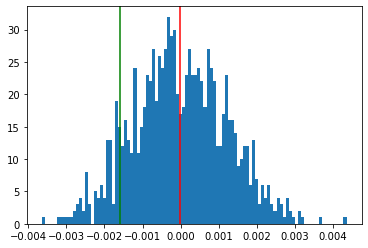

In [123]:
plt.hist(np_diff, bins=100)
low= ab_diff
high= np_diff.mean()
plt.axvline(low, color='g')
plt.axvline(high, color='r')